In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# Parameters
Lx, Ly = 1.0, 1.0  # Domain size
nx, ny = 41, 41  # Number of grid points
dx, dy = Lx / (nx - 1), Ly / (ny - 1)
alpha = 0.01  # Thermal diffusivity
Re = 100  # Reynolds number
Pr = 0.71  # Prandtl number

# Time-stepping parameters
dt = 0.001
nt = 50000

# Initialize fields
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
T = np.ones((ny, nx)) * 300  # Initial temperature
T[:, 0] = 400  # Boundary condition for temperature

# Initialize vorticity and stream function
omega = np.zeros((ny, nx))
psi = np.zeros((ny, nx))

# Time-stepping loop
for n in range(nt):
    # Solve for vorticity
    omega[1:-1, 1:-1] = (omega[1:-1, 1:-1] - 
                         dt * ((u[1:-1, 1:-1] * (omega[1:-1, 2:] - omega[1:-1, :-2]) / (2 * dx)) + 
                               (v[1:-1, 1:-1] * (omega[2:, 1:-1] - omega[:-2, 1:-1]) / (2 * dy)) -
                               (1 / Re) * ((omega[1:-1, 2:] - 2 * omega[1:-1, 1:-1] + omega[1:-1, :-2]) / dx**2 +
                                           (omega[2:, 1:-1] - 2 * omega[1:-1, 1:-1] + omega[:-2, 1:-1]) / dy**2)))
    
    # Boundary conditions for vorticity
    omega[0, :] = -2 * psi[1, :] / dy**2
    omega[-1, :] = -2 * psi[-2, :] / dy**2
    omega[:, 0] = -2 * psi[:, 1] / dx**2
    omega[:, -1] = -2 * psi[:, -2] / dx**2
    
    # Solve for stream function using relaxation
    psi[1:-1, 1:-1] = 0.25 * (psi[1:-1, 2:] + psi[1:-1, :-2] + psi[2:, 1:-1] + psi[:-2, 1:-1] - omega[1:-1, 1:-1] * dx**2)
    
    # Update velocities
    u[1:-1, 1:-1] = (psi[1:-1, 2:] - psi[1:-1, :-2]) / (2 * dy)
    v[1:-1, 1:-1] = -(psi[2:, 1:-1] - psi[:-2, 1:-1]) / (2 * dx)
    
    # Solve for temperature
    T[1:-1, 1:-1] = (T[1:-1, 1:-1] +
                     dt * ((-u[1:-1, 1:-1] * (T[1:-1, 2:] - T[1:-1, :-2]) / (2 * dx)) -
                           (v[1:-1, 1:-1] * (T[2:, 1:-1] - T[:-2, 1:-1]) / (2 * dy)) +
                           (alpha * ((T[1:-1, 2:] - 2 * T[1:-1, 1:-1] + T[1:-1, :-2]) / dx**2 +
                                     (T[2:, 1:-1] - 2 * T[1:-1, 1:-1] + T[:-2, 1:-1]) / dy**2))))

    # T[1:-1, 1:-1] = (T[1:-1, 1:-1] +
    #                  dt * (   (alpha * ((T[1:-1, 2:] - 2 * T[1:-1, 1:-1] + T[1:-1, :-2]) / dx**2 +
    #                                  (T[2:, 1:-1] - 2 * T[1:-1, 1:-1] + T[:-2, 1:-1]) / dy**2))))
    
    # Boundary conditions for temperature
    T[:, 0] = 400
    T[:, -1] = 300
    T[0, :] = 300
    T[-1, :] = 300

#     print(n)


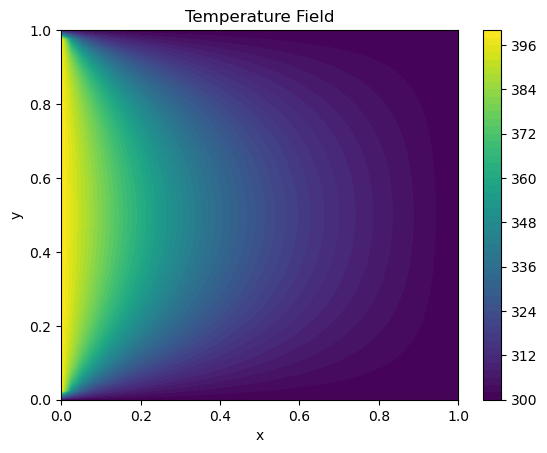

In [24]:

# Plot the temperature field
plt.contourf(np.linspace(0, Lx, nx), np.linspace(0, Ly, ny), T, levels=50)
plt.colorbar()
plt.title('Temperature Field')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

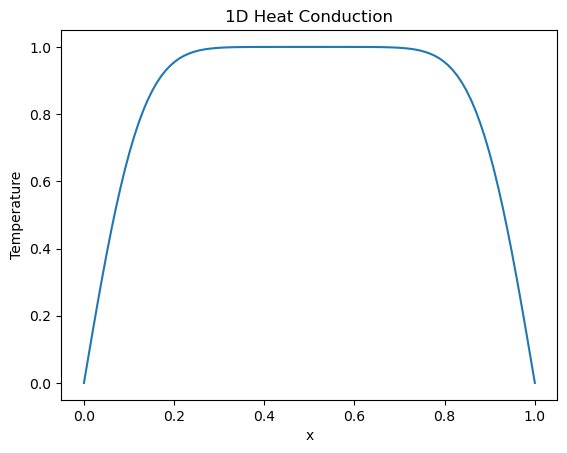

In [33]:
# Parameters
L = 1.0  # length of the rod
T = 0.5  # total time
nx = 100  # number of spatial points
nt = 100  # number of time steps
alpha = 0.01  # thermal diffusivity

dx = L / (nx - 1)
dt = T / nt
x = np.linspace(0, L, nx)

# Initial condition
u = np.ones(nx)
u[0] = 0
u[-1] = 0
# u[int(nx/2)] = 1  # initial heat at the center

# Time-stepping loop
for n in range(nt):
    un = u.copy()
    for i in range(1, nx-1):
        u[i] = un[i] + alpha * dt / dx**2 * (un[i+1] - 2*un[i] + un[i-1])

# Plotting
plt.plot(x, u)
plt.xlabel('x')
plt.ylabel('Temperature')
plt.title('1D Heat Conduction')
plt.show()